In [ ]:
from google.colab import files
files.upload()

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle

In [4]:
! chmod 600 ~/.kaggle/kaggle/json

chmod: cannot access '/root/.kaggle/kaggle/json': No such file or directory


In [5]:
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri

 90% 78.0M/86.8M [00:02<00:00, 21.3MB/s]
100% 86.8M/86.8M [00:03<00:00, 27.8MB/s]


In [6]:
import zipfile

unzip = zipfile.ZipFile("brain-tumor-classification-mri.zip","r")
unzip.extractall()
unzip.close()

In [7]:
import cv2

img = cv2.imread("/content/Testing/glioma_tumor/image(1).jpg")

img.shape

(619, 495, 3)

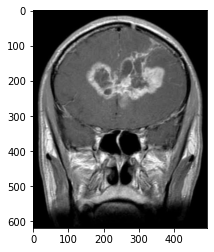

In [8]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.show()

In [9]:
train_dir = "/content/Training"
test_dir = "/content/Testing"

In [10]:
import tensorflow as tf

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 image_size=(224,224),
                                                                 label_mode = "categorical",
                                                                 batch_size = 32
                                                                 )
test_data =tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                               image_size =(224,224),
                                                               label_mode = "categorical",
                                                               batch_size = 32
                                                               )

Found 2870 files belonging to 4 classes.
Found 394 files belonging to 4 classes.


In [11]:
for image, label in train_data:
  print(image.shape)
  print(label.shape)
  break

(32, 224, 224, 3)
(32, 4)


In [12]:
label_names = train_data.class_names

label_names, len(label_names)

(['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor'], 4)

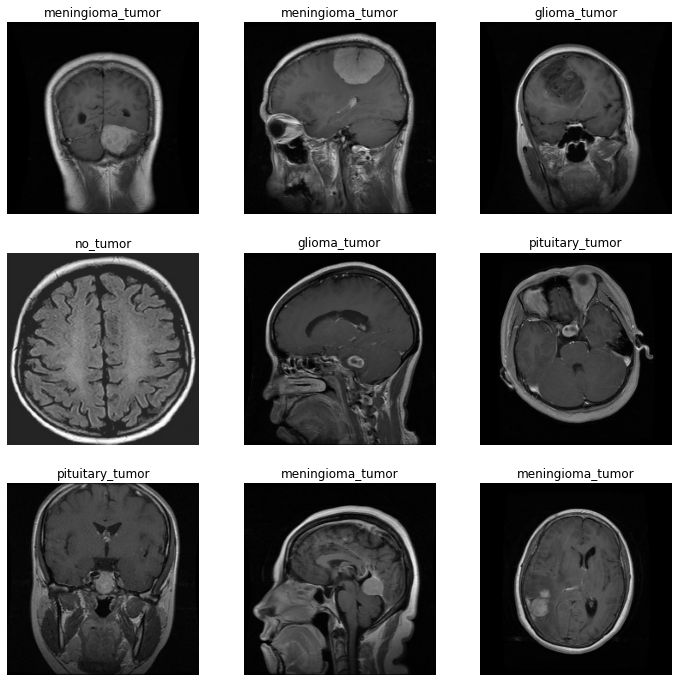

In [13]:
import matplotlib.pyplot as plt
import tensorflow as tf

plt.figure(figsize=(12,12))

for image, label in train_data.take(1):

  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(label_names[tf.argmax(label[i])])
    plt.axis("off")


In [57]:
# building a efficientnet model

import tensorflow as tf

base_model = tf.keras.applications.EfficientNetB5(include_top= False)
base_model.trainable = False

In [58]:
# building the model
import tensorflow as tf
from tensorflow.keras import layers

inputs = tf.keras.Input(shape=(224,224,3))

x = base_model(inputs)

x = layers.GlobalAveragePooling2D()(x)

outputs = layers.Dense(4, activation="softmax")(x)

model = tf.keras.Model(inputs,outputs)



In [59]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb5 (Functional)  (None, None, None, 2048)  28513527 
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 4)                 8196      
                                                                 
Total params: 28,521,723
Trainable params: 8,196
Non-trainable params: 28,513,527
_________________________________________________________________


In [60]:
# compiling the model

model.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
    metrics = ["accuracy"]
)

In [61]:
# fiiting data to the model

model.fit(train_data,
          epochs = 5,
          steps_per_epoch = len(train_data),
          validation_data = test_data,
          validation_steps = len(test_data)
)

Epoch 1/5
90/90 [==============================] - 67s 568ms/step - loss: 0.8459 - accuracy: 0.6749 - val_loss: 1.0328 - val_accuracy: 0.5787
Epoch 2/5
90/90 [==============================] - 48s 525ms/step - loss: 0.5681 - accuracy: 0.7972 - val_loss: 0.9481 - val_accuracy: 0.6320
Epoch 3/5
90/90 [==============================] - 48s 528ms/step - loss: 0.4778 - accuracy: 0.8310 - val_loss: 0.9224 - val_accuracy: 0.6675
Epoch 4/5
90/90 [==============================] - 48s 528ms/step - loss: 0.4304 - accuracy: 0.8495 - val_loss: 0.9121 - val_accuracy: 0.6878
Epoch 5/5
90/90 [==============================] - 48s 527ms/step - loss: 0.3919 - accuracy: 0.8711 - val_loss: 0.9025 - val_accuracy: 0.6878


In [62]:
base_model_evluation = model.evaluate(test_data)

13/13 [==============================] - 6s 433ms/step - loss: 0.9025 - accuracy: 0.6878


In [63]:
print(f"Base Modle Accuracy: {base_model_evluation[1] *100:0.2f} %")

Base Modle Accuracy: 68.78 %


##**Tunning the model**

In [77]:
# tunning the model
base_model.trainable = True

for layer in base_model.layers[:-1]:
  base_model.trainable = False

model.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
    metrics = ["accuracy"]
)


In [68]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb5 (Functional)  (None, None, None, 2048)  28513527 
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 4)                 8196      
                                                                 
Total params: 28,521,723
Trainable params: 8,196
Non-trainable params: 28,513,527
_________________________________________________________________


In [70]:
# fitting data to the tuned model

model.fit(train_data,
          epochs = 10,
          steps_per_epoch = len(train_data),
          validation_data = test_data,
          validation_steps = len(test_data)
          )

Epoch 1/10
90/90 [==============================] - 48s 526ms/step - loss: 0.1909 - accuracy: 0.9394 - val_loss: 1.0126 - val_accuracy: 0.7716
Epoch 2/10
90/90 [==============================] - 48s 528ms/step - loss: 0.1909 - accuracy: 0.9404 - val_loss: 1.0063 - val_accuracy: 0.7640
Epoch 3/10
90/90 [==============================] - 48s 526ms/step - loss: 0.1891 - accuracy: 0.9369 - val_loss: 0.9533 - val_accuracy: 0.7665
Epoch 4/10
90/90 [==============================] - 48s 527ms/step - loss: 0.1819 - accuracy: 0.9422 - val_loss: 0.9148 - val_accuracy: 0.7868
Epoch 5/10
90/90 [==============================] - 48s 526ms/step - loss: 0.1804 - accuracy: 0.9362 - val_loss: 0.9135 - val_accuracy: 0.7893
Epoch 6/10
90/90 [==============================] - 48s 527ms/step - loss: 0.1716 - accuracy: 0.9484 - val_loss: 1.0460 - val_accuracy: 0.7589
Epoch 7/10
90/90 [==============================] - 48s 527ms/step - loss: 0.1787 - accuracy: 0.9404 - val_loss: 0.9617 - val_accuracy: 0.7766

In [71]:
# evaluatinn the model
model_evaluation = model.evaluate(test_data)

13/13 [==============================] - 6s 436ms/step - loss: 1.0465 - accuracy: 0.7665


In [72]:
print(f"Model Accuracy:{model_evaluation[1] *100: 0.2f} %")

Model Accuracy: 76.65 %


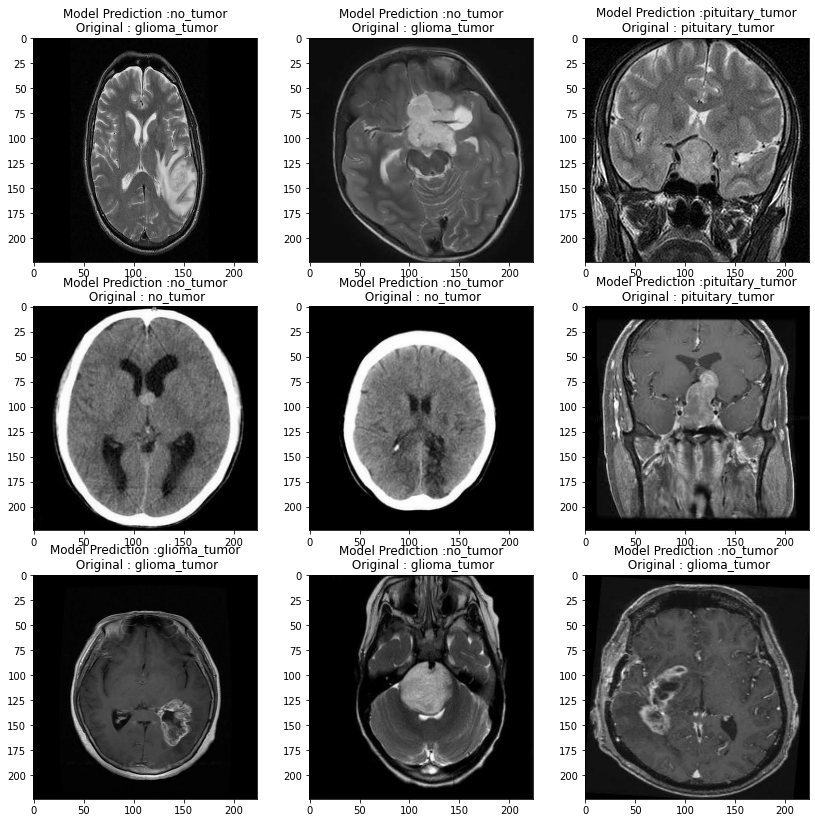

In [75]:
# predicting and visualizing the test data
import tensorflow as tf
import matplotlib.pyplot as plt

plt.figure(figsize=(14,14))

for image, label in test_data.take(1):
  model_prediction = model.predict(image)

  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(image[i].numpy().astype("uint8"))   
    plt.title(f"Model Prediction :{label_names[tf.argmax(model_prediction[i])]}\n Original : {label_names[tf.argmax(label[i])]}")

